# Librerias

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import folium
import json
from unidecode import unidecode

# 1. Cargar y Explorar el Dataset

In [3]:
df = pd.read_csv('..\\data\\raw\\Atletas_y_ParaAtletas_apoyados_20250203.csv')

In [4]:
df.head()

,ID,Tipo_Atleta,sexo,Deporte,Rango_Edad,Organización_deportiva,Subregión_nacimiento,Municipio_nacimiento,Año,Mes,Permanencia
0,129719,Atletas convencionales,Hombre,Esquí Nautico,2014-10-01T00:00:00.000,Esqui Nautico,Valle de Aburrá,Medellín,2021,1,Activo
1,129719,Atletas convencionales,Hombre,Esquí Nautico,2014-10-01T00:00:00.000,Esqui Nautico,Valle de Aburrá,Medellín,2021,10,Activo
2,129719,Atletas convencionales,Hombre,Esquí Nautico,2014-10-01T00:00:00.000,Esqui Nautico,Valle de Aburrá,Medellín,2021,11,Activo
3,129719,Atletas convencionales,Hombre,Esquí Nautico,2014-10-01T00:00:00.000,Esqui Nautico,Valle de Aburrá,Medellín,2021,12,Activo
4,129719,Atletas convencionales,Hombre,Esquí Nautico,2014-10-01T00:00:00.000,Esqui Nautico,Valle de Aburrá,Medellín,2021,2,Activo


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   ID                      60000 non-null  int64 
 1   Tipo_Atleta             60000 non-null  object
 2   sexo                    60000 non-null  object
 3   Deporte                 60000 non-null  object
 4   Rango_Edad              60000 non-null  object
 5   Organización_deportiva  60000 non-null  object
 6   Subregión_nacimiento    60000 non-null  object
 7   Municipio_nacimiento    60000 non-null  object
 8   Año                     60000 non-null  int64 
 9   Mes                     60000 non-null  int64 
 10  Permanencia             60000 non-null  object
dtypes: int64(3), object(8)
memory usage: 5.0+ MB


Vemos que tenemos 60000 registros y 11 columnas, sin datos nulos

Observamos que no hay valores nulos

In [6]:
df.describe(include='all')

,ID,Tipo_Atleta,sexo,Deporte,Rango_Edad,Organización_deportiva,Subregión_nacimiento,Municipio_nacimiento,Año,Mes,Permanencia
count,6.000000e+04,60000,60000,60000,60000,60000,60000,60000,60000.000000,60000.000000,60000
unique,NaN,2,2,74,14,47,10,96,NaN,NaN,2
top,NaN,Atletas convencionales,Hombre,Atletismo,20-24,Liga de Atletismo de Antioquia,Valle de Aburrá,Medellín,NaN,NaN,Activo
freq,NaN,47951,35768,4047,20973,4047,33761,27875,NaN,NaN,53815
mean,5.295777e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021.500000,6.492967,NaN
std,5.662602e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.500004,3.392857,NaN
min,1.100000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021.000000,1.000000,NaN
25%,1.297670e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021.000000,4.000000,NaN
50%,1.303400e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021.500000,7.000000,NaN
75%,1.303390e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022.000000,9.000000,NaN


# 2. Distribución General de los Atletas

## Por tipo de atleta: ¿Cuántos son atletas vs. paraatletas?

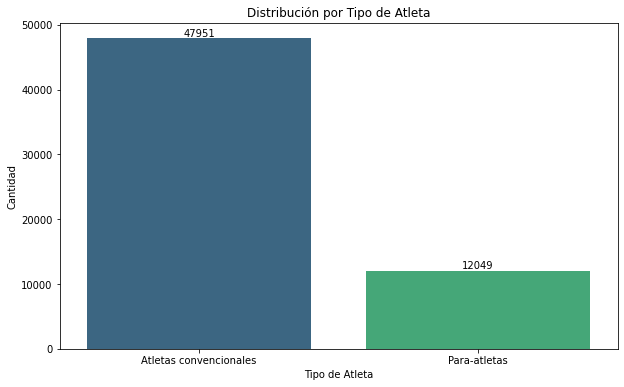

In [7]:
# Contar la cantidad de atletas y para-atletas
tipo_atleta_counts = df['Tipo_Atleta'].value_counts()

# Graficar la distribución con valores
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=tipo_atleta_counts.index, y=tipo_atleta_counts.values, palette='viridis')
plt.title('Distribución por Tipo de Atleta')
plt.xlabel('Tipo de Atleta')
plt.ylabel('Cantidad')

# Añadir los valores encima de las barras
for i in ax.containers:
    ax.bar_label(i, label_type='edge')

plt.show()

In [8]:
# Calcular porcentajes para tipo de atleta
tipo_atleta_percent = tipo_atleta_counts / tipo_atleta_counts.sum() * 100
print(tipo_atleta_percent)

Atletas convencionales    79.918333
Para-atletas              20.081667
Name: Tipo_Atleta, dtype: float64


## Por género: ¿Cuántos hombres y mujeres han sido apoyados?

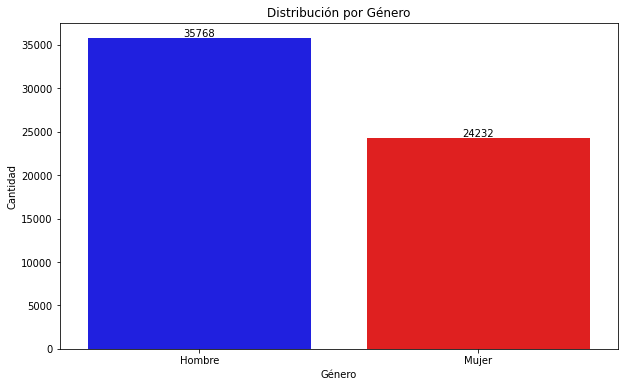

In [9]:
# Contar la cantidad de hombres y mujeres
genero_counts = df['sexo'].value_counts()

# Graficar la distribución con valores
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=genero_counts.index, y=genero_counts.values, palette=['blue', 'red'])
plt.title('Distribución por Género')
plt.xlabel('Género')
plt.ylabel('Cantidad')

# Añadir los valores encima de las barras
for i in ax.containers:
    ax.bar_label(i, label_type='edge')

plt.show()

In [10]:
# Calcular porcentajes para género
genero_percent = genero_counts / genero_counts.sum() * 100
print(genero_percent)

Hombre    59.613333
Mujer     40.386667
Name: sexo, dtype: float64


## Por deporte: ¿Cuáles son los deportes más y menos apoyados?

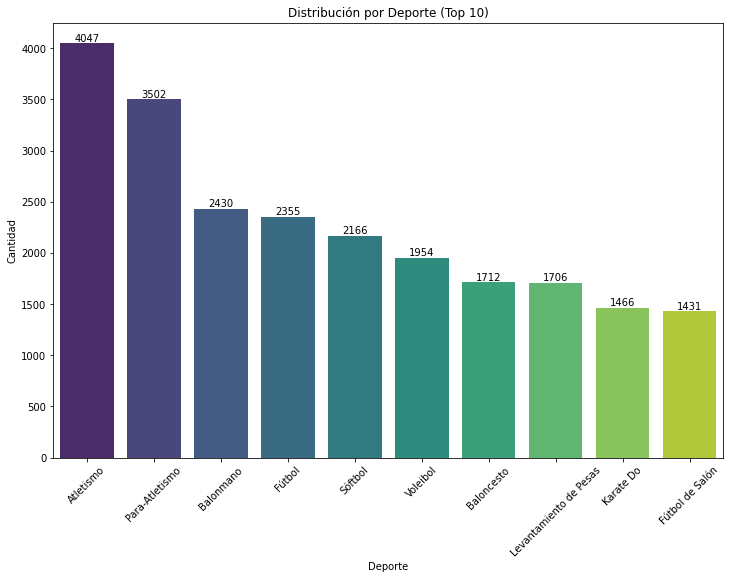

In [11]:
# Contar la cantidad de atletas por deporte
deporte_counts = df['Deporte'].value_counts()

# Seleccionar los 10 deportes más apoyados
top_deportes = deporte_counts.head(10)

# Graficar la distribución con valores
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=top_deportes.index, y=top_deportes.values, palette='viridis')
plt.title('Distribución por Deporte (Top 10)')
plt.xlabel('Deporte')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)

# Añadir los valores encima de las barras
for i in ax.containers:
    ax.bar_label(i, label_type='edge')

plt.show()

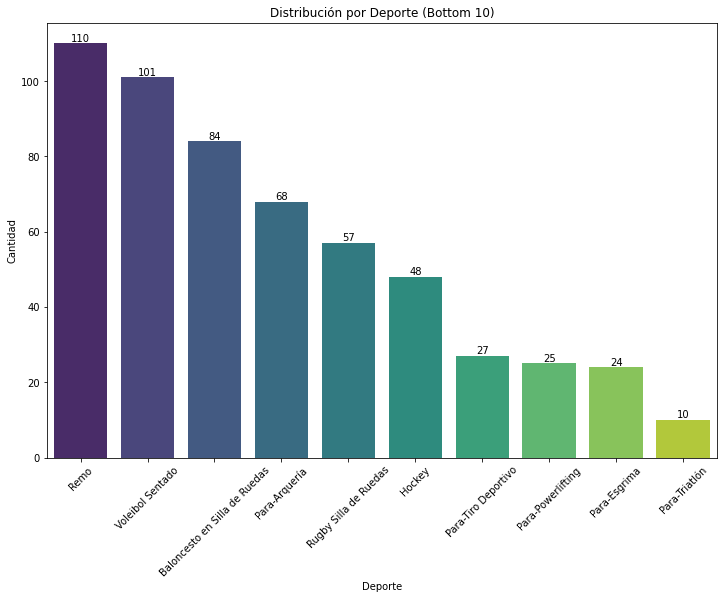

In [12]:
# Seleccionar los 10 deportes menos apoyados
bottom_deportes = deporte_counts.tail(10)

# Graficar la distribución con valores
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=bottom_deportes.index, y=bottom_deportes.values, palette='viridis')
plt.title('Distribución por Deporte (Bottom 10)')
plt.xlabel('Deporte')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)

# Añadir los valores encima de las barras
for i in ax.containers:
    ax.bar_label(i, label_type='edge')

plt.show()

In [13]:
# Mostrar los deportes más y menos apoyados
deporte_mas_apoyado = deporte_counts.idxmax()
deporte_menos_apoyado = deporte_counts.idxmin()
print(f"Deporte más apoyado: {deporte_mas_apoyado} con {deporte_counts.max()} atletas")
print(f"Deporte menos apoyado: {deporte_menos_apoyado} con {deporte_counts.min()} atletas")

Deporte más apoyado: Atletismo con 4047 atletas
Deporte menos apoyado: Para-Triatlón con 10 atletas


## Por organización deportiva: ¿Cuáles concentran más atletas?


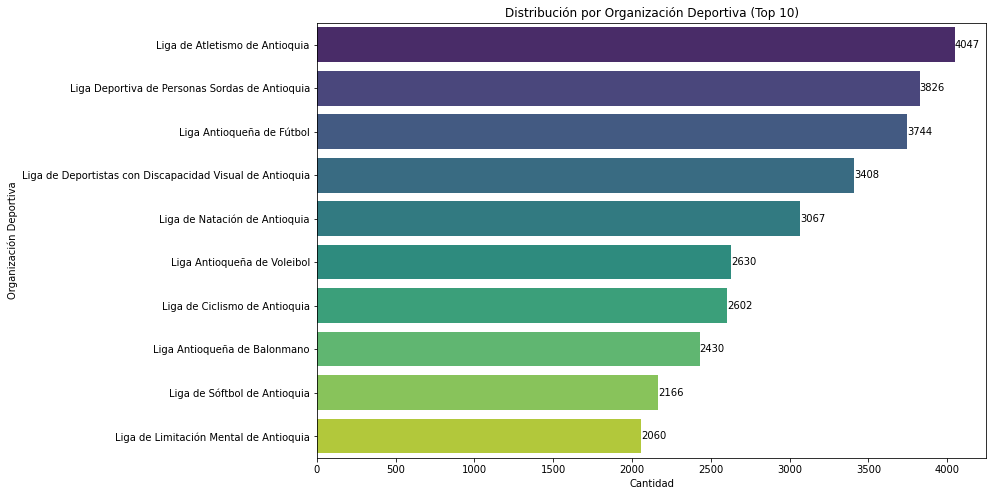

In [14]:
# Contar la cantidad de atletas por organización deportiva
organizacion_counts = df['Organización_deportiva'].value_counts()

# Seleccionar las 10 organizaciones con más atletas
top_organizaciones = organizacion_counts.head(10)

# Graficar la distribución con valores
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=top_organizaciones.values, y=top_organizaciones.index, palette='viridis')
plt.title('Distribución por Organización Deportiva (Top 10)')
plt.xlabel('Cantidad')
plt.ylabel('Organización Deportiva')

# Añadir los valores al lado de las barras
for i in ax.containers:
    ax.bar_label(i, label_type='edge')

plt.show()


# 3. Análisis Temporal

## Evolución del número de atletas apoyados por año.

In [15]:
# Contar el número de atletas por año
atletas_por_anio = df.groupby("Año")["ID"].count().reset_index()

# Renombrar columna para mayor claridad
atletas_por_anio.rename(columns={"ID": "total_atletas"}, inplace=True)

atletas_por_anio

,Año,total_atletas
0,2021,30000
1,2022,30000


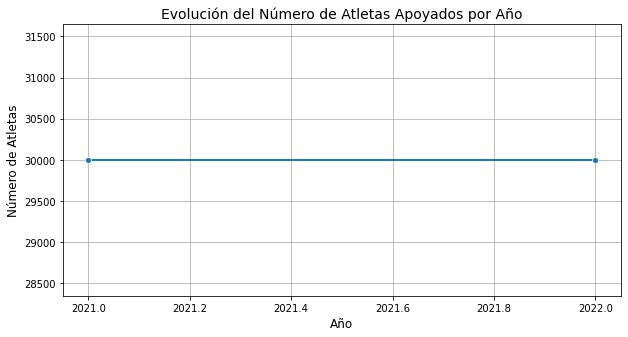

In [16]:
# Configurar el gráfico
plt.figure(figsize=(10, 5))
sns.lineplot(data=atletas_por_anio, x="Año", y="total_atletas", marker="o", linewidth=2)

# Personalizar la visualización
plt.title("Evolución del Número de Atletas Apoyados por Año", fontsize=14)
plt.xlabel("Año", fontsize=12)
plt.ylabel("Número de Atletas", fontsize=12)
plt.grid(True)
plt.show()

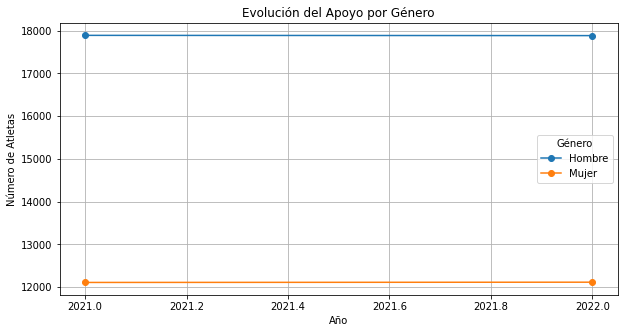

In [17]:
# Contar el número de atletas por año por sexo
df.groupby(["Año", "sexo"])["ID"].count().unstack().plot(kind="line", marker="o", figsize=(10, 5))
plt.title("Evolución del Apoyo por Género")
plt.xlabel("Año")
plt.ylabel("Número de Atletas")
plt.legend(title="Género")
plt.grid(True)
plt.show()

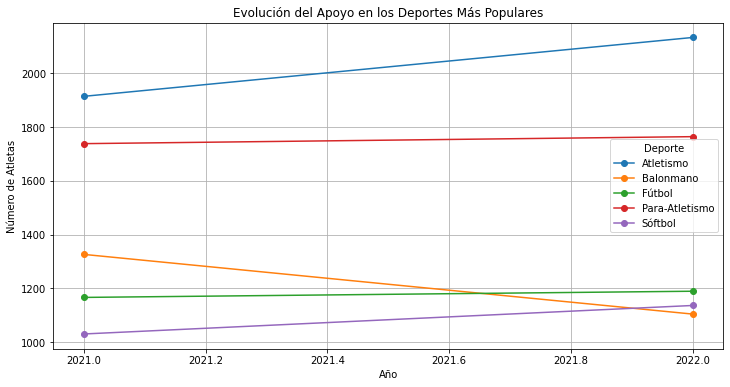

In [18]:
# Evolución en deportes mas populares

deportes_top = df["Deporte"].value_counts().head(5).index
df_filtrado = df[df["Deporte"].isin(deportes_top)]
df_filtrado.groupby(["Año", "Deporte"])["ID"].count().unstack().plot(kind="line", marker="o", figsize=(12, 6))
plt.title("Evolución del Apoyo en los Deportes Más Populares")
plt.xlabel("Año")
plt.ylabel("Número de Atletas")
plt.legend(title="Deporte")
plt.grid(True)
plt.show()

## ¿Existen meses con más apoyo que otros?


In [19]:
# Contar el número de atletas por mes
atletas_por_mes = df.groupby("Mes")["ID"].count().reset_index()

# Renombrar columna para mayor claridad
atletas_por_mes.rename(columns={"ID": "total_atletas"}, inplace=True)

# Ordenar los meses en el orden correcto (1 a 12)
atletas_por_mes = atletas_por_mes.sort_values("Mes")

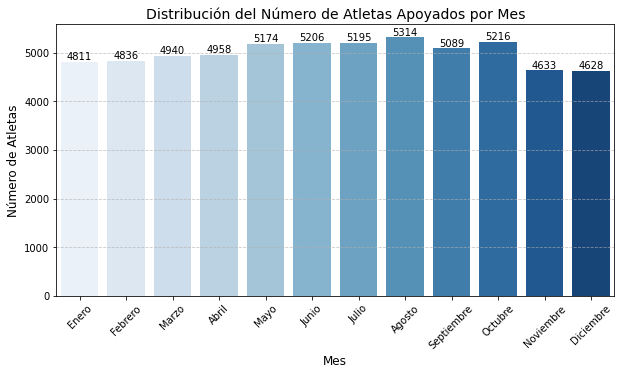

In [20]:
# Configurar el gráfico
plt.figure(figsize=(10, 5))
ax = sns.barplot(data=atletas_por_mes, x="Mes", y="total_atletas", palette="Blues")

# Añadir los valores encima de las barras
for container in ax.containers:
    ax.bar_label(container, label_type='edge')

# Personalizar la visualización
plt.title("Distribución del Número de Atletas Apoyados por Mes", fontsize=14)
plt.xlabel("Mes", fontsize=12)
plt.ylabel("Número de Atletas", fontsize=12)
plt.xticks(ticks=range(12), labels=[
    "Enero", "Febrero", "Marzo", "Abril", "Mayo", "Junio", 
    "Julio", "Agosto", "Septiembre", "Octubre", "Noviembre", "Diciembre"], rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

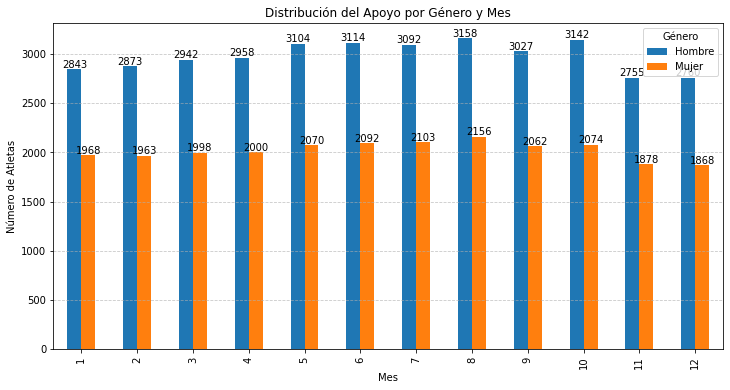

In [21]:
ax = df.groupby(["Mes", "sexo"])["ID"].count().unstack().plot(kind="bar", figsize=(12, 6))
plt.title("Distribución del Apoyo por Género y Mes")
plt.xlabel("Mes")
plt.ylabel("Número de Atletas")
plt.legend(title="Género")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Añadir los valores encima de las barras
for container in ax.containers:
    ax.bar_label(container, label_type='edge')

plt.show()

Podría haber una estacionalidad en el apoyo, con picos en meses centrales (mayo a julio) y disminuciones hacia el final del año (noviembre y diciembre).
Esto podría estar relacionado con los ciclos de competencias o asignación presupuestaria.

# 4. Distribución Geográfica

In [22]:
# Número de atletas por subregión
atletas_por_subregion = df.groupby("Subregión_nacimiento")["ID"].count().reset_index()
atletas_por_subregion.rename(columns={"ID": "total_atletas"}, inplace=True)

# Número de atletas por municipio
atletas_por_municipio = df.groupby("Municipio_nacimiento")["ID"].count().reset_index()
atletas_por_municipio.rename(columns={"ID": "total_atletas"}, inplace=True)


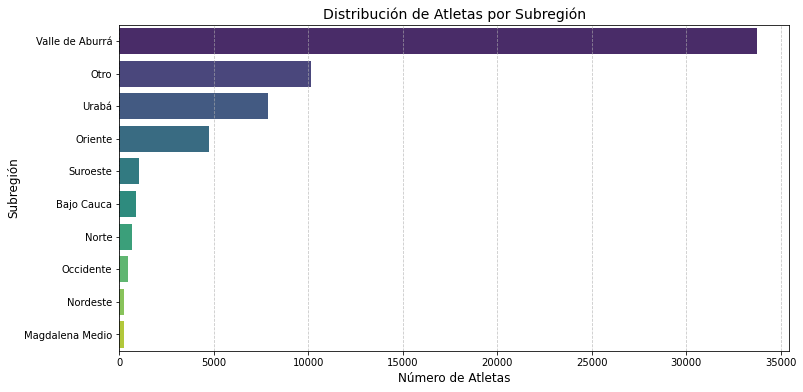

In [23]:
# Subregiones con más atletas
top_subregiones = atletas_por_subregion.sort_values("total_atletas", ascending=False)

# Gráfico
plt.figure(figsize=(12, 6))
sns.barplot(data=top_subregiones, x="total_atletas", y="Subregión_nacimiento", palette="viridis")
plt.title("Distribución de Atletas por Subregión", fontsize=14)
plt.xlabel("Número de Atletas", fontsize=12)
plt.ylabel("Subregión", fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()


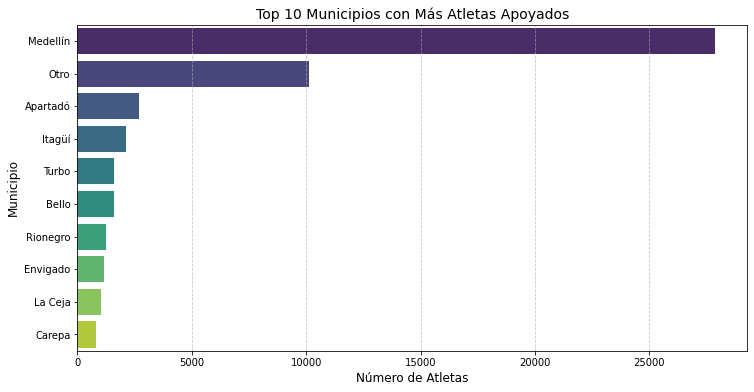

In [24]:
# Municipios con más atletas
top_municipios = atletas_por_municipio.sort_values("total_atletas", ascending=False).head(10)

# Gráfico
plt.figure(figsize=(12, 6))
sns.barplot(data=top_municipios, x="total_atletas", y="Municipio_nacimiento", palette="viridis")
plt.title("Top 10 Municipios con Más Atletas Apoyados", fontsize=14)
plt.xlabel("Número de Atletas", fontsize=12)
plt.ylabel("Municipio", fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()


In [45]:
# Cambiar los nombres de los municipios a mayúsculas
atletas_por_municipio['Municipio_nacimiento'] = atletas_por_municipio['Municipio_nacimiento'].str.upper()

# Remover tildes de los nombres de los municipios
atletas_por_municipio['Municipio_nacimiento'] = atletas_por_municipio['Municipio_nacimiento'].apply(unidecode)
atletas_por_municipio

,Municipio_nacimiento,total_atletas
0,ALEJANDRIA,73
1,AMAGA,132
2,AMALFI,42
3,ANDES,104
4,ANZA,24
...,...,...
91,VENECIA,140
92,VIGIA DEL FUERTE,140
93,YARUMAL,221
94,YOLOMBO,11


In [46]:
# Cargar el archivo de shapes de Antioquia
shapefile_path = "..\\data\\raw\\shapes_antioquia\\shapes.shp"
mapa_antioquia = gpd.read_file(shapefile_path)

# Asegúrate de que los nombres de los municipios coincidan con los del dataset
# Ejemplo: columna en el shapefile = "nombre_mpi"
print(mapa_antioquia.columns)  # Print columns to find the correct name

# Filtrar solo los municipios de Antioquia
mapa_antioquia = mapa_antioquia[mapa_antioquia['dpto'] == '05']

Index(['area', 'perimeter', 'dpto', 'nombre_dpt', 'mpio', 'nombre_mpi',
       'nombre_cab', 'mpios', 'hectares', 'geometry'],
      dtype='object')


In [47]:
mapa_antioquia.sort_values(by='nombre_mpi')

,area,perimeter,dpto,nombre_dpt,mpio,nombre_mpi,nombre_cab,mpios,hectares,geometry
363,5.079210e+08,98055.601554,05,ANTIOQUIA,002,ABEJORRAL,ABEJORRAL,05002,50792.104,"POLYGON ((-75.4901 5.9288, -75.4774 5.9293, -7..."
155,2.821064e+08,76981.332261,05,ANTIOQUIA,004,ABRIAQUI,ABRIAQUI,05004,28210.638,"POLYGON ((-76.0226 6.6548, -76.0295 6.6588, -7..."
722,1.320453e+08,59832.492631,05,ANTIOQUIA,021,ALEJANDRIA,ALEJANDRIA,05021,13204.532,"POLYGON ((-75.1566 6.397, -75.1381 6.3969, -75..."
425,1.022498e+08,43020.995206,05,ANTIOQUIA,030,AMAGA,AMAGA,05030,10224.981,"POLYGON ((-75.753 6.0685, -75.7507 6.076, -75...."
29,1.181499e+09,164423.522161,05,ANTIOQUIA,031,AMALFI,AMALFI,05031,118149.874,"POLYGON ((-74.9178 7.2745, -74.9184 7.2624, -7..."
...,...,...,...,...,...,...,...,...,...,...
759,4.873958e+08,113031.806270,05,ANTIOQUIA,885,YALI,YALI,05885,48739.585,"POLYGON ((-74.6022 6.762, -74.5976 6.7505, -74..."
615,7.348036e+08,151890.473054,05,ANTIOQUIA,887,YARUMAL,YARUMAL,05887,73480.362,"POLYGON ((-75.3104 7.2213, -75.315 7.2156, -75..."
153,8.967191e+08,218508.726260,05,ANTIOQUIA,890,YOLOMBO,YOLOMBO,05890,89671.910,"POLYGON ((-75.1245 6.7688, -75.1199 6.7653, -7..."
139,1.826058e+09,209276.653949,05,ANTIOQUIA,893,YONDO,CASABE,05893,182605.806,"POLYGON ((-73.954 7.2636, -73.9557 7.2428, -73..."


In [48]:
# Unir el GeoDataFrame con el DataFrame de atletas por municipio
mapa_antioquia = mapa_antioquia.merge(atletas_por_municipio, left_on="nombre_mpi", right_on="Municipio_nacimiento", how="left")

# Crear el mapa base
mapa = folium.Map(location=[6.25184, -75.56359], zoom_start=8, tiles='cartodb positron')

# Añadir los datos al mapa
folium.Choropleth(
    geo_data=mapa_antioquia,
    name="choropleth",
    data=mapa_antioquia,
    columns=["nombre_mpi", "total_atletas"],
    key_on="feature.properties.nombre_mpi",
    fill_color="YlGn",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Número de Atletas por Municipio",
    nan_fill_color='white',  # Color para municipios sin datos
    nan_fill_opacity=0.1
).add_to(mapa)

# Añadir indicadores proporcionales al valor de atletas por municipio
for idx, row in mapa_antioquia.iterrows():
    if not pd.isna(row['total_atletas']):
        folium.CircleMarker(
            location=[row['geometry'].centroid.y, row['geometry'].centroid.x],
            radius=row['total_atletas'] / 1000,  # Ajustar el tamaño del círculo
            color='blue',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6,
            popup=f"{row['nombre_mpi']}: {row['total_atletas']} atletas"
        ).add_to(mapa)

# Añadir capas de control
folium.LayerControl().add_to(mapa)

# Mostrar el mapa
mapa


In [49]:
# exportar mapa
mapa.save("..\\data\\processed\\mapa_atletas_antioquia.html")